In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

## Load Data

In [48]:
## Load Data
data = np.genfromtxt('data.csv', delimiter=',')
X = data[:, :-1]
y = data[:, -1:]

## Create Model

### Cách 1

In [49]:
## Create Model
model = keras.Sequential()
model.add(keras.layers.Input(1,))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Cách 2

In [2]:
model = keras.Sequential(keras.layers.Dense(units=1, input_shape=[1]))

## Visualize model

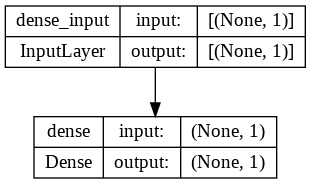

In [3]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="my_model.png", show_shapes=True)

## Training

In [ ]:
## declare optimization method and loss function

####### Cách 1 #######
model.compile(optimizer='sgd', loss='mean_squared_error')

####### Cách 2 #######
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='mse')

In [ ]:
## Param
batch_size = 4
epochs = 100

history = model.fit(X, y, batch_size, epochs)

## Visualize Loss Function

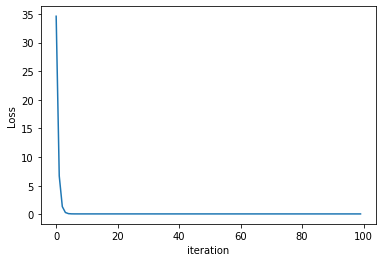

In [20]:
import matplotlib.pyplot as plt

# plot losses
plt.plot(history.history['loss'])
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

## Get weights

In [41]:
# parameters after one epoch
print(model.layers[0].get_weights())

[array([[1.3035403]], dtype=float32), array([-0.0223108], dtype=float32)]


## Predict

### Cách 1

In [ ]:
## Predict
X_testing = [[5.0]]
X_testing = np.array(X_testing)

y_hat = model(X_testing)
print(y_hat)

### Cách 2

In [54]:
## Predict
X_testing = [[5.0]]

y_hat = model.predict(X_testing)
print(y_hat)

1/1 [==============================] - 0s 50ms/step
[[6.2007194]]


## Save-Load Weights

In [ ]:
# save weights
checkpoint_path = "my_model/model.ckpt"
model.save_weights(checkpoint_path)

In [30]:
import tensorflow as tf
import tensorflow.keras as keras

# create model
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(units=1, input_shape=[1])])

# load model
model.load_weights('my_model/model.ckpt')

X_testing = [[5.0]]
y_hat = model.predict(X_testing)
print(y_hat)

1/1 [==============================] - 0s 49ms/step
[[6.5138087]]


## Save-Load Model

In [ ]:
# save entire model
model.save('my_model/model.h5') 

In [32]:
import tensorflow as tf
import tensorflow.keras as keras

# load model
model = tf.keras.models.load_model('my_model/model.h5')

# testing
X_testing = [[5.0]]
y_hat = model.predict(X_testing)
print(y_hat)

1/1 [==============================] - 0s 46ms/step
[[6.5159726]]


## Initialize weights

In [ ]:
## Load Data
data = np.genfromtxt('data.csv', delimiter=',')
X = data[:, :-1]
y = data[:, -1:]

# initialize parameters
model.layers[0].set_weights([np.array([[-0.34]]), np.array([0.04])])

# declare optimization method and loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# training
model.fit(X, y, 4, epochs=100)

# parameters after one epoch
print('weight-bias: \n', model.layers[0].get_weights())